In [1]:
import pandas as pd

data = pd.read_excel("Inventory Dataset.xlsx", sheet_name="Sheet1")
print(data)

     Item Number       Date  Inventory
0    064-01-1347 2023-06-17       3561
1    064-01-1361 2023-06-17       4035
2    064-01-1375 2023-06-17       2684
3    064-01-1385 2023-06-17       5136
4    064-01-1399 2023-06-17       6399
..           ...        ...        ...
351  064-18-9909 2023-06-17         12
352  064-18-9962 2023-06-17         19
353  064-18-0790 2023-06-17          5
354  064-18-3316 2023-06-17       7354
355  064-18-9667 2023-06-17       7029

[356 rows x 3 columns]


In [14]:
data_new = pd.read_excel("New Inventory.xlsx", sheet_name="Sheet3")

print(data_new)

      Item Number Inventory Receive  Total Item Qty
0     064-13-0002        2023-07-07             700
1     064-13-0338        2023-07-07            1700
2     064-13-0340        2023-07-07            1000
3     064-13-0353        2023-07-07            1900
4     064-13-0416        2023-07-07            1000
...           ...               ...             ...
1034  064-09-3787        2023-07-07            2088
1035  064-09-5287        2023-07-07            1388
1036  064-09-7924        2023-07-07            1632
1037  064-09-9076        2023-07-07            1708
1038  064-09-9115        2023-07-07            1920

[1039 rows x 3 columns]


In [15]:
sort_data= data.sort_values("Item Number")
print(sort_data)

     Item Number       Date  Inventory
32   064-01-0006 2023-06-17         10
26   064-01-1346 2023-06-17       2954
0    064-01-1347 2023-06-17       3561
10   064-01-1348 2023-06-17       3028
20   064-01-1349 2023-06-17       2036
..           ...        ...        ...
319  064-18-9878 2023-06-17          2
350  064-18-9884 2023-06-17      12419
351  064-18-9909 2023-06-17         12
289  064-18-9938 2023-06-17       2736
352  064-18-9962 2023-06-17         19

[356 rows x 3 columns]


In [16]:
sort_data_new= data_new.sort_values("Item Number")

print(sort_data_new)

     Item Number Inventory Receive  Total Item Qty
467  064-01-0003        2023-09-29            5488
144  064-01-0003        2023-10-13            1864
152  064-01-0005        2023-10-13            2520
475  064-01-0005        2023-09-29            7380
458  064-01-0012        2023-09-29            6840
..           ...               ...             ...
280  064-18-9938        2023-09-29            1976
634  064-18-9938        2023-09-08            2084
43   064-18-9938        2023-08-16            2084
938  064-18-9938        2023-07-28            3196
539  064-18-9938        2023-08-04            1368

[1039 rows x 3 columns]


In [20]:
frames =[sort_data, sort_data_new]
datam =pd.merge(sort_data, sort_data_new, on="Item Number", how="outer")
print(datam)

      Item Number       Date  Inventory Inventory Receive  Total Item Qty
0     064-01-0006 2023-06-17       10.0               NaT             NaN
1     064-01-1346 2023-06-17     2954.0        2023-08-16          1000.0
2     064-01-1346 2023-06-17     2954.0        2023-08-04          1400.0
3     064-01-1346 2023-06-17     2954.0        2023-07-07          1072.0
4     064-01-1346 2023-06-17     2954.0        2023-07-10          2000.0
...           ...        ...        ...               ...             ...
1224  064-18-4295        NaT        NaN        2023-09-15          5148.0
1225  064-18-4752        NaT        NaN        2023-12-08          8076.0
1226  064-18-4752        NaT        NaN        2023-11-26         12424.0
1227  064-18-9904        NaT        NaN        2023-12-01         18700.0
1228  064-18-9904        NaT        NaN        2023-12-15          5100.0

[1229 rows x 5 columns]


In [24]:
out = datam.pivot_table(index=['Item Number'],columns=['Date',"Inventory Receive"],values=['Inventory', 'Total Item Qty'],aggfunc={ 'Total Item Qty': 'sum'})
out.fillna(0)
print(out)

                  Total Item Qty                                              \
Date                  2023-06-17                                               
Inventory Receive     2023-07-07 2023-07-09 2023-07-10 2023-07-14 2023-07-21   
Item Number                                                                    
064-01-1346               1072.0     2464.0     2000.0        NaN        NaN   
064-01-1347               1000.0     3568.0     2000.0        NaN        NaN   
064-01-1348                788.0     1920.0     1644.0        NaN        NaN   
064-01-1349               1000.0     2920.0     1904.0        NaN        NaN   
064-01-1351                848.0     1308.0      648.0        NaN        NaN   
...                          ...        ...        ...        ...        ...   
064-18-9089               1600.0     4276.0        NaN        NaN     1600.0   
064-18-9182                  NaN     8260.0        NaN        NaN        NaN   
064-18-9667                  NaN        

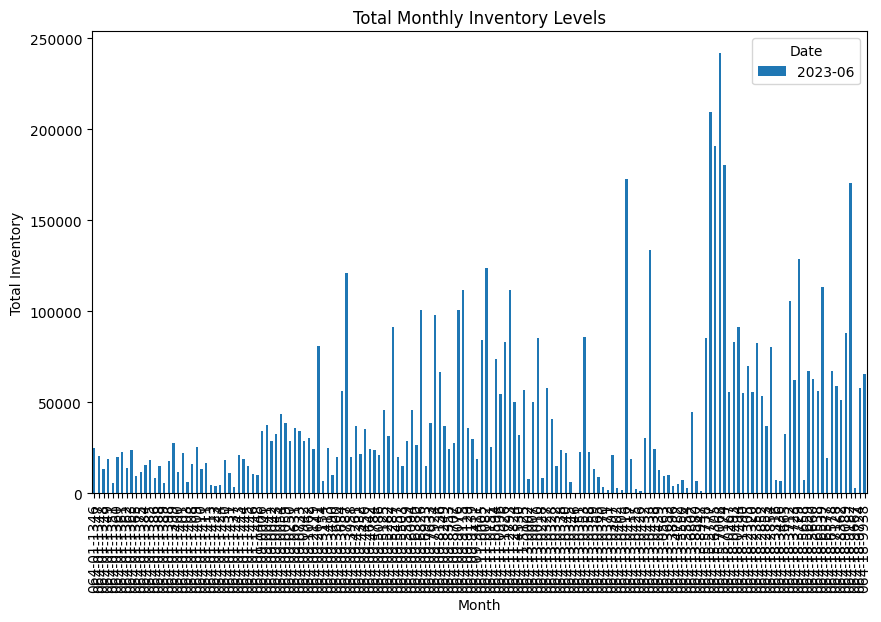

In [25]:
import matplotlib.pyplot as plt
cumulative_inventory = out.cumsum(axis=1)


# Create a bar chart showing total monthly inventory levels
monthly_totals = cumulative_inventory.groupby(cumulative_inventory.columns.get_level_values(1).to_period('M'), axis=1).sum()

# Plot the bar chart
monthly_totals.plot(kind='bar', figsize=(10, 6))
plt.title('Total Monthly Inventory Levels')
plt.xlabel('Month')
plt.ylabel('Total Inventory')
plt.legend(title='Date')
plt.show()

# New Section